In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
import csv

In [2]:
data=pd.read_csv("train_features.csv")
charges=pd.read_csv("train_targets.csv")
test_data = pd.read_csv("test_features.csv")

In [3]:
def map_smoking(column):
    mapped=[]
    for row in column:       
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)     
    return mapped
data["smoker"]=map_smoking(data["smoker"])
test_data["smoker"]=map_smoking(test_data["smoker"])

In [4]:
def map_sex(column):
    mapped=[]
    for row in column:
        
        if row=="female":
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
data["sex"]=map_sex(data["sex"])
test_data["sex"]=map_sex(test_data["sex"])

In [5]:
def map_bmi_seperated(column):
    mapped=[]
    for row in column:
        
        if row > 29.72:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
data["bmi"]=map_bmi_seperated(data["bmi"])
test_data["bmi"]=map_bmi_seperated(test_data["bmi"])

In [6]:
def map_region(column):
    mapped=[]
    for row in column:
        
        if row=="northeast":
            mapped.append(1)
        elif row=="northwest":
            mapped.append(0)
        elif row=="southeast":
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
data["region"]=map_region(data["region"])
test_data["region"]=map_region(test_data["region"])

In [7]:
def map_children(column):
    mapped=[]
    for row in column:       
        if row==0:
            mapped.append(7)
        elif row == 1:
            mapped.append(5)
        elif row == 2:
            mapped.append(4)
        elif row == 3:
            mapped.append(3)
        elif row == 4:
            mapped.append(2)
        else:
            mapped.append(1)      
    return mapped
data["children"]=map_children(data["children"])
test_data["children"]=map_children(test_data["children"])

In [8]:
def map_smoke_age(column, column1, column2,charges):
    mapped=[]
    sum_value = [0] * 12
    sum_num = [0] * 12
    for i in range(len(column)):    
        if column1[i] == 1 and column2[i] == 1 and column[i] > 50:
            sum_value[0] = sum_value[0] + charges[i]
            sum_num[0] = sum_num[0] + 1
            mapped.append(float(sum_value[0]/sum_num[0]))
        elif column1[i] == 1 and column2[i] == 1 and column[i] < 50 and column[i] > 28:
            sum_value[1] = sum_value[1] + charges[i]
            sum_num[1] = sum_num[1] + 1
            mapped.append(float(sum_value[1]/sum_num[1]))
        elif column1[i] == 1 and column2[i] == 1 and column[i] < 28:
            sum_value[2] = sum_value[2] + charges[i]
            sum_num[2] = sum_num[2] + 1
            mapped.append(float(sum_value[2]/sum_num[2]))
        elif column1[i] == 1 and column2[i] == 0 and column[i] > 50:
            sum_value[3] = sum_value[3] + charges[i]
            sum_num[3] = sum_num[3] + 1
            mapped.append(float(sum_value[3]/sum_num[3]))
        elif column1[i] == 1 and column2[i] == 0 and column[i] < 50 and column[i] > 28:
            sum_value[4] = sum_value[4] + charges[i]
            sum_num[4] = sum_num[4] + 1
            mapped.append(float(sum_value[4]/sum_num[4]))
        elif column1[i] == 1 and column2[i] == 0 and column[i] < 28:
            sum_value[5] = sum_value[5] + charges[i]
            sum_num[5] = sum_num[5] + 1
            mapped.append(float(sum_value[5]/sum_num[5]))
        elif column1[i] == 0 and column2[i] == 1 and column[i] > 50:
            sum_value[6] = sum_value[6] + charges[i]
            sum_num[6] = sum_num[6] + 1
            mapped.append(float(sum_value[6]/sum_num[6]))
        elif column1[i] == 0 and column2[i] == 1 and column[i] < 50 and column[i] > 28:
            sum_value[7] = sum_value[7] + charges[i]
            sum_num[7] = sum_num[7] + 1
            mapped.append(float(sum_value[7]/sum_num[7]))
        elif column1[i] == 0 and column2[i] == 1 and column[i] < 28:
            sum_value[8] = sum_value[8] + charges[i]
            sum_num[8] = sum_num[8] + 1
            mapped.append(float(sum_value[8]/sum_num[8]))
        elif column1[i] == 0 and column2[i] == 0 and column[i] > 50:
            sum_value[9] = sum_value[9] + charges[i]
            sum_num[9] = sum_num[9] + 1
            mapped.append(float(sum_value[9]/sum_num[9]))
        elif column1[i] == 0 and column2[i] == 0 and column[i] < 50 and column[i] > 28:
            sum_value[10] = sum_value[10] + charges[i]
            sum_num[10] = sum_num[10] + 1
            mapped.append(float(sum_value[10]/sum_num[10]))
        else:
            sum_value[11] = sum_value[11] + charges[i]
            sum_num[11] = sum_num[11] + 1
            mapped.append(float(sum_value[11]/sum_num[11]))
    
    return_value = [0]*12
    for i in range(len(sum_value)):
        return_value[i] = float(sum_value[i]/sum_num[i])

    return mapped, return_value
data["smoke_age"], coefficients=map_smoke_age(data["age"], data["smoker"], data["bmi"], charges.to_numpy())

In [9]:
def map_smoke_age_test(column, column1, column2,charges):
    mapped=[]
    for i in range(len(column)): 
        if column1[i] == 1 and column2[i] == 1 and column[i] > 50:
            mapped.append(float(charges[0]))
        elif column1[i] == 1 and column2[i] == 1 and column[i] < 50 and column[i] > 25:
            mapped.append(float(charges[1]))
        elif column1[i] == 1 and column2[i] == 1 and column[i] < 25:
            mapped.append(float(charges[2]))
        elif column1[i] == 1 and column2[i] == 0 and column[i] > 50:
            mapped.append(float(charges[3]))
        elif column1[i] == 1 and column2[i] == 0 and column[i] < 50 and column[i] > 25:
            mapped.append(float(charges[4]))
        elif column1[i] == 1 and column2[i] == 0 and column[i] < 25:
            mapped.append(float(charges[5]))
        elif column1[i] == 0 and column2[i] == 1 and column[i] > 50:
            mapped.append(float(charges[6]))
        elif column1[i] == 0 and column2[i] == 1 and column[i] < 50 and column[i] > 25:
            mapped.append(float(charges[7]))
        elif column1[i] == 0 and column2[i] == 1 and column[i] < 25:
            mapped.append(float(charges[8]))
        elif column1[i] == 0 and column2[i] == 0 and column[i] > 50:
            mapped.append(float(charges[9]))
        elif column1[i] == 0 and column2[i] == 0 and column[i] < 50 and column[i] > 25:
            mapped.append(float(charges[10]))
        else:
            mapped.append(float(charges[11]))
            
    return mapped
            
test_data["smoke_age"]=map_smoke_age_test(test_data["age"], test_data["smoker"], test_data["bmi"], coefficients)


In [10]:
def map_smoke_bmi(column, column1,charges):
    mapped=[]
    sum_value = [0] * 4
    sum_num = [0] * 4    
    for i in range(len(column)):    
        if column[i] == 1 and column1[i] == 1:
            sum_value[0] = sum_value[0] + charges[i]
            sum_num[0] = sum_num[0] + 1
            mapped.append(float(sum_value[0]/sum_num[0]))
        elif column[i] == 1 and column1[i] == 0:
            sum_value[1] = sum_value[1] + charges[i]
            sum_num[1] = sum_num[1] + 1
            mapped.append(float(sum_value[1]/sum_num[1]))
        elif column[i] == 0 and column1[i] == 1:
            sum_value[2] = sum_value[2] + charges[i]
            sum_num[2] = sum_num[2] + 1
            mapped.append(float(sum_value[2]/sum_num[2]))
        else:
            sum_value[3] = sum_value[3] + charges[i]
            sum_num[3] = sum_num[3] + 1
            mapped.append(float(sum_value[3]/sum_num[3]))
            
    return_value = [0]*4
    for i in range(len(sum_value)):
        return_value[i] = float(sum_value[i]/sum_num[i])
    return mapped, return_value
data["smoke_bmi"],coef_smoke_bmi=map_smoke_bmi(data["smoker"], data["bmi"], charges.to_numpy())

def map_smoke_bmi_test(column, column1,charges):
    mapped=[]
  
    for i in range(len(column)):    
        if column[i] == 1 and column1[i] == 1:

            mapped.append(charges[0])
        elif column[i] == 1 and column1[i] == 0:

            mapped.append(charges[1])
        elif column[i] == 0 and column1[i] == 1:

            mapped.append(charges[2])
        else:

            mapped.append(charges[3])
            
    return mapped

test_data["smoke_bmi"]=map_smoke_bmi_test(test_data["smoker"], test_data["bmi"], coef_smoke_bmi)

In [11]:
def map_bmi_age(column, column1, charges):
    mapped=[]
    sum_value = [0] * 6
    sum_num = [0] * 6
    for i in range(len(column)):    
        if column1[i] == 1 and column[i] > 50:
            sum_value[0] = sum_value[0] + charges[i]
            sum_num[0] = sum_num[0] + 1
            mapped.append(float(sum_value[0]/sum_num[0]))
        elif column1[i] == 1 and column[i] < 50 and column[i] > 28:
            sum_value[1] = sum_value[1] + charges[i]
            sum_num[1] = sum_num[1] + 1
            mapped.append(float(sum_value[1]/sum_num[1]))
        elif column1[i] == 1 and column[i] < 28:
            sum_value[2] = sum_value[2] + charges[i]
            sum_num[2] = sum_num[2] + 1
            mapped.append(float(sum_value[2]/sum_num[2]))
        elif column1[i] == 0 and column[i] > 50:
            sum_value[3] = sum_value[3] + charges[i]
            sum_num[3] = sum_num[3] + 1
            mapped.append(float(sum_value[3]/sum_num[3]))
        elif column1[i] == 0 and column[i] < 50 and column[i] > 28:
            sum_value[4] = sum_value[4] + charges[i]
            sum_num[4] = sum_num[4] + 1
            mapped.append(float(sum_value[4]/sum_num[4]))
        else:
            sum_value[5] = sum_value[5] + charges[i]
            sum_num[5] = sum_num[5] + 1
            mapped.append(float(sum_value[5]/sum_num[5]))
            
    return_value = [0]*6
    for i in range(len(sum_value)):
        return_value[i] = float(sum_value[i]/sum_num[i])
    return mapped, return_value
data["bmi_age"], coef_bmi_age=map_bmi_age(data["age"], data["bmi"], charges.to_numpy())

def map_bmi_age_test(column, column1, charges):
    mapped=[]

    for i in range(len(column)):    
        if column1[i] == 1 and column[i] > 50:
            mapped.append(charges[0])
        elif column1[i] == 1 and column[i] < 50 and column[i] > 25:
            mapped.append(charges[1])
        elif column1[i] == 1 and column[i] < 25:
            mapped.append(charges[2])
        elif column1[i] == 0 and column[i] > 50:
            mapped.append(charges[3])
        elif column1[i] == 0 and column[i] < 50 and column[i] > 25:
            mapped.append(charges[4])
        else:
            mapped.append(charges[5])
            
    return mapped

test_data["bmi_age"]=map_bmi_age_test(test_data["age"], test_data["bmi"], coef_bmi_age)

In [12]:
def map_beta0(column):
    mapped=[]
    for row in column:
        mapped.append(100)

    return mapped
data["beta0"]=map_beta0(data["sex"])
test_data["beta0"]=map_beta0(test_data["sex"])

In [13]:
insurance=pd.concat([data,charges], axis = 1)
insurance.info()
insurance.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        900 non-null    int64  
 1   sex        900 non-null    int64  
 2   bmi        900 non-null    int64  
 3   children   900 non-null    int64  
 4   smoker     900 non-null    int64  
 5   region     900 non-null    int64  
 6   smoke_age  900 non-null    float64
 7   smoke_bmi  900 non-null    float64
 8   bmi_age    900 non-null    float64
 9   beta0      900 non-null    int64  
 10  charges    900 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 77.5 KB


,age,sex,bmi,children,smoker,region,smoke_age,smoke_bmi,bmi_age,beta0,charges
0,40,1,0,5,0,1,7077.189400,7077.189400,7077.189400,100,7077.18940
1,18,0,1,7,0,1,12890.057650,12890.057650,12890.057650,100,12890.05765
2,55,1,0,4,0,0,11881.358000,9479.273700,11881.358000,100,11881.35800
3,64,1,1,7,0,1,14313.846300,13601.951975,14313.846300,100,14313.84630
4,34,0,0,7,0,1,5788.764325,7819.628883,5788.764325,100,4500.33925
5,57,1,1,7,0,0,13078.235025,13015.509233,13078.235025,100,11842.62375
6,22,1,0,7,0,0,2527.818650,6496.676325,2527.818650,100,2527.81865
7,40,0,0,4,0,1,6250.296200,6632.013050,6250.296200,100,7173.35995
8,50,0,1,4,1,0,22692.328325,42856.838000,22692.328325,100,42856.83800
9,28,0,1,7,0,0,21685.997460,14679.965857,21685.997460,100,19673.33573


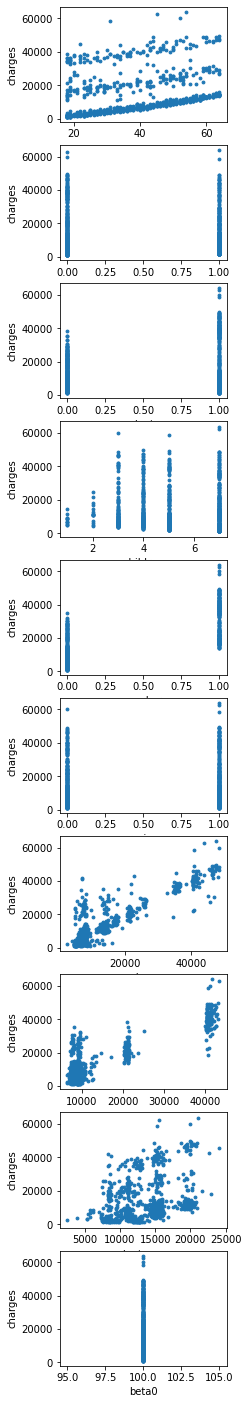

In [14]:
colnum=len(insurance.columns)-1
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in insurance.columns if i not in ["charges"]]):
    
    ax[ind].scatter(insurance[col],insurance.charges,s=8)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

age :  0.27318757388117704
sex :  0.05410954910762674
bmi :  0.20610540985120246
children :  0.04631026947971111
smoker :  0.786622587284171
region :  0.07896884122744396
smoke_age :  0.8920347868710832
smoke_bmi :  0.871189522112024
bmi_age :  0.3326819409513677
beta0 :  nan
charges :  1.0


C:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Text(0, 0.5, 'Absolute correlation')

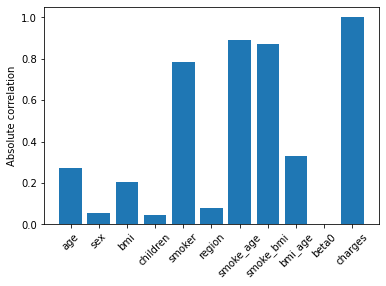

In [15]:
corr_vals=[]
collabel=[]
for col in [i for i in insurance.columns]:
    
    p_val=sp.stats.pearsonr(insurance[col],insurance["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")

In [16]:
data.drop('sex', inplace=True, axis=1)
data.drop('bmi', inplace=True, axis=1)


In [17]:
def calculate_insurance(beta_vector,data):
    y=(beta_vector[0] * data[0][0])+(beta_vector[1] * data[0][1])+(beta_vector[2] * data[0][2])+(beta_vector[3] * data[0][3])+(beta_vector[4] * data[0][4])+(beta_vector[5] * data[0][5])+(beta_vector[6] * data[0][6])+(beta_vector[7] * data[0][7])
    return y

In [18]:


data1 = data.to_numpy()
charges1 = charges.to_numpy()
insurance1 = insurance.to_numpy()



def mse(beta_vector, x, y):
    return np.mean((np.dot(x, beta_vector)  - y)**2)/2

def multiple_gradient_descent_KFold(x, y, learning_rate = 0.0003, max_its = 300000):


    mse_list = [0] * 5                            #MSE for every fold
    low_error = 1000000000
    
    k_counter = 0
    pick = 0
    
    matrix = [[0]*7 for i in range(5)]
    
    cv = KFold(n_splits=5, random_state=1, shuffle=True)       #Split data to 5 fold

    
    for train_index, test_index in cv.split(x, y):
        beta_vector = [1,2,3,4,5,6,7]
        

        x_test = np.delete(x,test_index, 0)                    #split training data
        y_test = np.delete(y,test_index, 0)
        
            
       
        beta_vector = np.matmul(np.linalg.inv(np.matmul(x_test.T, x_test)),np.matmul(x_test.T,y_test))

            


        matrix[k_counter] = beta_vector
        
        mse_list[k_counter] = mse(beta_vector, x_test, y_test)
#         print(mse_list[k_counter])
        
#         print(beta_vector)
        
        if mse_list[k_counter] < low_error:
            low_error = mse_list[k_counter]
            pick = k_counter

        


        k_counter+=1
    beta_vector = matrix[pick]
    predictions = np.dot(data1, beta_vector)
    predi= calculate_insurance(beta_vector, data1)
    print("MSE between the ground truth and predicted samples: {0}".format(mean_squared_error(predictions, insurance["charges"].to_numpy())))
    print("="*80)
    print("Predictions:")
    print(predictions)
#     print(matrix)
#     print(matrix[pick])
    return matrix[pick]

beta_vector = multiple_gradient_descent_KFold(data1, insurance["charges"].to_numpy())
# print("="*50)
# print(beta_vector)
# predictions = np.dot(data1, beta_vector)
# print("MSE between the ground truth and predicted samples: {0}".format(mean_squared_error(predictions, insurance["charges"].to_numpy())))





MSE between the ground truth and predicted samples: 23505392.551688775
Predictions:
[ 7499.1754847   7218.24436504 13531.15429917 17354.65660919
  5580.63234217 15181.90874601  1487.91523376  7513.78329327
 39264.71609794 12087.77466588  6134.96789214  3809.18128853
 12047.62485582 12366.97567638  8844.58890285  5422.71144625
 12094.32165419  6052.96957672  7936.98206677 38007.50578745
 43153.61955208  3505.38236452  6960.54966872  7082.01956671
 15740.36268989  9673.72177488  4301.88659658 10640.13214956
  4317.29135536 26484.97418677 10971.74245814 11847.92135912
  7898.37911661  5795.85352979 15912.36894904 12619.70748215
  8239.18087058 12952.07294204  8064.82903311  7951.56087229
 10878.84465883 28953.79478777  8672.348616   10832.22511643
 13234.45211276  9254.29636721  8175.34264854 38676.67767571
 33376.35394798  8963.10158514 10883.19480949 12698.1169032
  8689.21451775  8325.60848525 26226.91884101  4107.60848401
  6728.2115985  15208.06159237  6621.41659614 13961.79500784
 1

In [19]:
print(test_data)

     age  sex  bmi  children  smoker  region     smoke_age     smoke_bmi  \
0     31    1    0         4       0       0   7712.858772   8053.902553   
1     60    0    0         7       0       0  13210.512886   8053.902553   
2     29    0    0         5       0       1   7712.858772   8053.902553   
3     44    0    1         5       1       1  40646.872970  40419.036305   
4     43    1    1         5       0       0   7968.261513   9011.018383   
..   ...  ...  ...       ...     ...     ...           ...           ...   
433   29    0    1         4       1       0  40646.872970  40419.036305   
434   62    0    1         7       0       1  13481.917792   9011.018383   
435   33    1    1         5       0       1   7968.261513   9011.018383   
436   37    1    1         5       0       0   7968.261513   9011.018383   
437   40    1    1         7       0       1   7968.261513   9011.018383   

          bmi_age  beta0  
0    11105.501824    100  
1    15807.345627    100  
2    1

In [20]:

#data.drop('obese', inplace=True, axis=1)
#test_data.drop('bmi', inplace=True, axis=1)


def submission_csv(test_data,beta_vector):

    result = [ [0]*2 for i in range(len(test_data))]
    for i in range(0,len(test_data + 1)):
        result[i][0] = i
        result[i][1] = calculate_insurance(beta_vector,test_data.values[i:i + 1])
        
    with open('submission.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)

        header = ("ID", "predicted")
        writer.writerow(header)


        writer.writerows(result)
        

submission_csv(test_data,beta_vector)

In [21]:
data1 = data.to_numpy()
charges1 = charges.to_numpy()
insurance1 = insurance.to_numpy()



def mse(beta_vector, x, y):
    return np.mean((np.dot(x, beta_vector)  - y)**2)/2

def multiple_gradient_descent_KFold(x, y, learning_rate = 0.0001, max_its = 300000):


    mse_list = [0] * 5                            #MSE for every fold
    low_error = 1000000000
    
    k_counter = 0
    pick = 0
    
    matrix = [[0]*8 for i in range(5)]
    
    cv = KFold(n_splits=5, random_state=1, shuffle=True)       #Split data to 5 fold

    
    for train_index, test_index in cv.split(x, y):
        beta_vector = [1,2,3,4,5,6,7,8]
        

        x_test = np.delete(x,test_index, 0)                    #split training data
        y_test = np.delete(y,test_index, 0)
        
        
        
            
        for i in range(0, max_its):
            dl_beta_vector = [0] *8                     #gradient vector form
           
          
            
            dl_beta_vector = (-2 * np.matmul(x_test.T,y_test - np.matmul(x_test,beta_vector)))/len(y_test)  #calculation of gradient
            
            beta_vector = beta_vector - (learning_rate * dl_beta_vector)            #update beta vector

            


        matrix[k_counter] = beta_vector
        
        mse_list[k_counter] = mse(beta_vector, x_test, y_test)
        print(mse_list[k_counter])
        
        print(beta_vector)
        
        if mse_list[k_counter] < low_error:
            low_error = mse_list[k_counter]
            pick = k_counter

        


        k_counter+=1
        
    print(matrix)
    print(matrix[pick])
    return matrix[pick]

# beta_vector = multiple_gradient_descent_KFold(data1, insurance["charges"].to_numpy())
# predictions = np.dot(data1, beta_vector)
# print("=======")
# print(mean_squared_error(predictions, insurance["charges"].to_numpy()))

